# Intensity Distribution Plotting

# Functions

In [5]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

def subsintdist(substrate_directory):  # Only Substrate Incidences
    distance = list()
    intensity = list()
    with open(substrate_directory, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for coordinate in csv_reader:
            delta_x = float(coordinate[2]) - float(coordinate[0])
            distance.append(float(delta_x))
            intensity.append(float(coordinate[4]))
    total = np.cumsum(distance)
    return total, intensity


def itintdist(roller_directory, incoming_tape_directory):  # Only Incoming Tape Incidences
    rintensity = list()
    rx1 = list()
    ry1 = list()
    rx2 = list()
    ry2 = list()
    print('Enter Roller file directory')
    with open(roller_directory, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for xy in csv_reader:
            rx1.append(float(xy[0]))
            rx2.append(float(xy[2]))
            ry1.append(float(xy[1]))
            ry2.append(float(xy[3]))
            rintensity.append(float(xy[4]))
    itintensity = list()
    itx1 = list()
    ity1 = list()
    itx2 = list()
    ity2 = list()
    with open(incoming_tape_directory, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for coordinate in csv_reader:
            itx1.append(float(coordinate[0]))
            itx2.append(float(coordinate[2]))
            ity1.append(float(coordinate[1]))
            ity2.append(float(coordinate[3]))
            itintensity.append(float(coordinate[4]))
    x1 = rx1 + itx1
    y1 = ry1 + ity1
    x2 = rx2 + itx2
    y2 = ry2 + ity2
    deltax = [j - i for i, j in zip(x1, x2)] 
    deltay = [j - i for i, j in zip(y1, y2)]
    dist = [math.sqrt(i ** 2 + j ** 2) for i, j in zip(deltax, deltay)]
    distance = list(np.cumsum(dist))
    intensity = rintensity + itintensity
    return distance, intensity


def subsitdist(substrate_path, roller_path, incoming_tape_path):  # Substrate and Incoming Tape Incidences
    flt_distance = list()
    subsintensity = list()
    with open(substrate_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for coordinate in csv_reader:
            delta_x = float(coordinate[2]) - float(coordinate[0])
            flt_distance.append(float(delta_x))
            subsintensity.append(float(coordinate[4]))
    subsdistance = np.cumsum(flt_distance)
    rintensity = list()
    rx1 = list()
    ry1 = list()
    rx2 = list()
    ry2 = list()
    with open(roller_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for xy in csv_reader:
            rx1.append(float(xy[0]))
            rx2.append(float(xy[2]))
            ry1.append(float(xy[1]))
            ry2.append(float(xy[3]))
            rintensity.append(float(xy[4]))
    itintensity = list()
    itx1 = list()
    ity1 = list()
    itx2 = list()
    ity2 = list()
    with open(incoming_tape_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for coordinate in csv_reader:
            itx1.append(float(coordinate[0]))
            itx2.append(float(coordinate[2]))
            ity1.append(float(coordinate[1]))
            ity2.append(float(coordinate[3]))
            itintensity.append(float(coordinate[4]))
    x1 = rx1 + itx1
    y1 = ry1 + ity1
    x2 = rx2 + itx2
    y2 = ry2 + ity2
    deltax = [j - i for i, j in zip(x1, x2)] 
    deltay = [j - i for i, j in zip(y1, y2)]
    dist = [math.sqrt(i ** 2 + j ** 2) for i, j in zip(deltax, deltay)]
    itdistance = list(np.cumsum(dist))
    itintensity = rintensity + itintensity
    return subsdistance, subsintensity, itdistance, itintensity


# Only Substrate Incidence Distribution

<IPython.core.display.Javascript object>


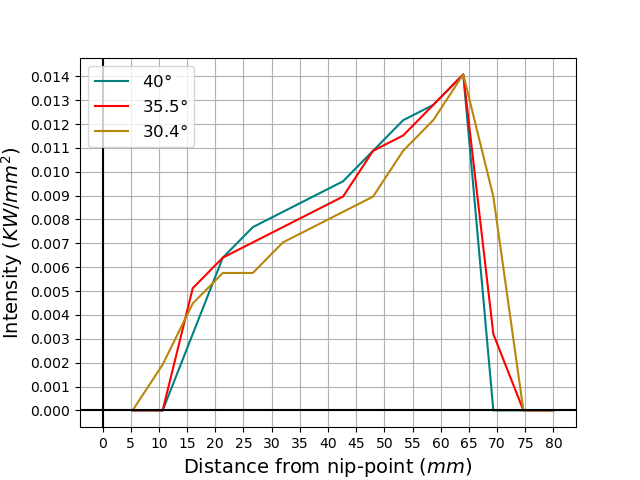

In [2]:
%matplotlib notebook

subs_path1 = ''
distance1, int1 = subsintdist(subs_path1)
plt.plot(distance1, int1, color='teal', label='$40\degree$')

subs_path2 = ''
distance2, int2 = subsintdist(subs_path2)
plt.plot(distance2, int2, color='red', label='$35.5\degree$')

subs_path3 = ''
distance3, int3 = subsintdist(subs_path3)
plt.plot(distance3, int3, color='darkgoldenrod', label='$30.4\degree$')

plt.axhline(color='black')  # X axis
plt.axvline(color='black')  # Y Axis
plt.locator_params(axis="x", nbins=30)
plt.locator_params(axis="y", nbins=30)
plt.grid(True)
plt.xlabel('Distance from nip-point $(mm)$', fontsize=14)
plt.ylabel('Intensity $(KW/mm^2)$', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.title('Substrate Incidences', fontsize=16)
plt.savefig('Substrate_Distribution.svg')

# Incoming Tape and Roller

Enter Roller file directory


<IPython.core.display.Javascript object>


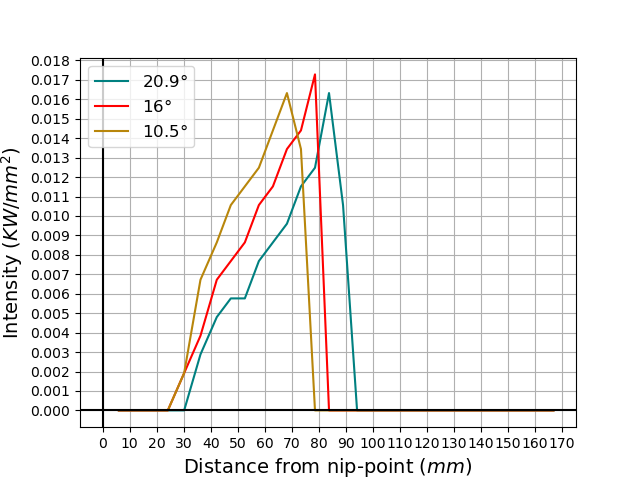

Enter Roller file directory
Enter Roller file directory


In [3]:
%matplotlib notebook

roller_path1 = ''
it_path1 = ''
distance1, intensity1 = itintdist(roller_path1, it_path1)
plt.plot(distance1, intensity1, color='teal', label='$20.9\degree$')

roller_path2 = ''
it_path2 = ''
distance2, intensity2 = itintdist(roller_path2, it_path2)
plt.plot(distance2, intensity2, color='red', label='16$\degree$')

roller_path3 = ''
it_path3 = ''
distance3, intensity3 = itintdist(roller_path3, it_path3)
plt.plot(distance3, intensity3, color='darkgoldenrod', label='$10.5\degree$')

plt.axhline(color='black')  # X axis
plt.axvline(color='black')  # Y Axis
plt.locator_params(axis="x", nbins=30)
plt.locator_params(axis="y", nbins=30)
plt.grid(True)
plt.xlabel('Distance from nip-point $(mm)$', fontsize=14)
plt.ylabel('Intensity $(KW/mm^2)$', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.title('Incoming Tape Incidences', fontsize=16)
plt.savefig('IT_and_Roller_Distribution.svg')

# Substrate and Incoming Tape

<IPython.core.display.Javascript object>


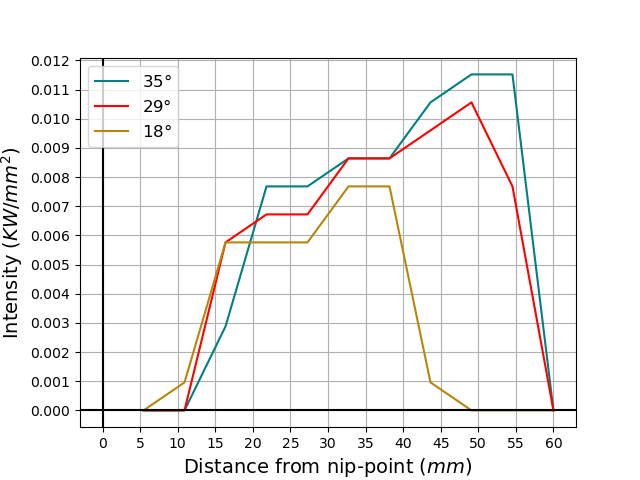

<IPython.core.display.Javascript object>


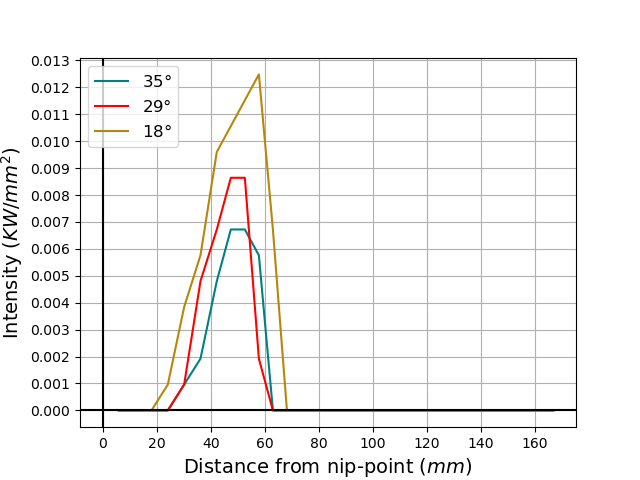

In [6]:
%matplotlib notebook

subs_path1 = ''
roller_path1 = ''
itpath_1 = ''
subsdistance1, subsintensity1, itdistance1, itintensity1 = subsitdist(subs_path1, roller_path1, itpath_1)
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
ax1.plot(subsdistance1, subsintensity1, color='teal', label='$35\degree$')
ax2.plot(itdistance1, itintensity1, color='teal', label='$35\degree$')

subs_path2 = ''
roller_path2 = ''
itpath_2 = ''
subsdistance2, subsintensity2, itdistance2, itintensity2 = subsitdist(subs_path2, roller_path2, itpath_2)
ax1.plot(subsdistance2, subsintensity2, color='red', label='$29\degree$')
ax2.plot(itdistance2, itintensity2, color='red', label='$29\degree$')

subs_path3 = ''
roller_path3 = ''
itpath_3 = ''
subsdistance3, subsintensity3, itdistance3, itintensity3 = subsitdist(subs_path3, roller_path3, itpath_3)
ax1.plot(subsdistance3, subsintensity3, color='darkgoldenrod', label='$18\degree$')
ax2.plot(itdistance3, itintensity3, color='darkgoldenrod', label='$18\degree$')

ax1.axhline(color='black')  # X axis
ax1.axvline(color='black')  # Y Axis
ax1.locator_params(axis="x", nbins=30)
ax1.locator_params(axis="y", nbins=30)
ax1.locator_params(nbins=15)
ax1.set_xlabel('Distance from nip-point $(mm)$', fontsize=14)
ax1.set_ylabel('Intensity $(KW/mm^2)$', fontsize=14)
ax1.legend(loc='upper left', fontsize=12)
ax1.set_title('Substrate Incidences', size=16)
ax1.grid(True)
ax2.axhline(color='black')  # X axis
ax2.axvline(color='black')  # Y Axis
ax2.locator_params(axis="x", nbins=30)
ax2.locator_params(axis="y", nbins=30)
ax2.locator_params(nbins=15)
ax2.grid(True)
ax2.set_xlabel('Distance from nip-point $(mm)$', fontsize=14)
ax2.set_ylabel('Intensity $(KW/mm^2)$', fontsize=14)
ax2.legend(loc='upper left', fontsize=12)
ax2.set_title('Incoming Tape Incidences', size=16)
fig1.savefig('Substrate_IT_Distribution.svg')
fig2.savefig('Subs_Incoming_Tape_Distribution.svg')
